<a href="https://colab.research.google.com/github/KORALLLL/summer_practice/blob/main/bagging/Test_fc_nn_on_augmentation_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# В этом исследовании будет сравнение обучения двух идентичных нейронный сетей, но на разных данных. Первая будет на не обработанных изображения, вторая целиком и полностью на обработанных. Результат будет оцениваться не необработанных тестовых изображениях.

датасет: MNIST

размер обучающей выборки:60000(обычных)/60000(аугментированных)

размер тестирующей выборки: 10000

количество скрытых слоёв: 2

количество нейронов в скрытых слоя: 200

функция активации: сигмоида

функция потерь: кросс энтропия

оптимизатор: RMSProp(lr = 0.001)

размер батча: 2000

количество эпох: 500

In [5]:
import torch
import torchvision.datasets
import torchvision.transforms
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as bar

mnist_train = torchvision.datasets.MNIST('./', download = True, train = True)
mnist_test = torchvision.datasets.MNIST('./', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_data = mnist_train.data.float().reshape([-1, 28*28]).to(device)
train_labels = mnist_train.targets.to(device)
test_data = mnist_test.data.float().reshape([-1, 28*28]).to(device)
test_labels = mnist_test.targets.to(device)

class MNISTNetRow(torch.nn.Module):
  def __init__(self):
    super(MNISTNetRow, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, 200)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(200, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

loss = torch.nn.CrossEntropyLoss()

batch_size = 2000

accuracy = []

100%|██████████| 9912422/9912422 [00:00<00:00, 82615906.18it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 70061130.03it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23770360.81it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18057373.24it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [24]:
for experiment in bar(range(50), desc = 'experimenting'):
  net = MNISTNetRow().to(device)

  optimizer = torch.optim.RMSprop(net.parameters(), lr=0.001)
  for epoch in bar(range(500), desc = 'learning'):
    order = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index + batch_size]

      train_data_batch = train_data[batch_indexes]
      train_labels_batch = train_labels[batch_indexes]

      preds = net.forward(train_data_batch)

      loss_val = loss(preds, train_labels_batch)
      loss_val.backward()

      optimizer.step()

  test_preds = net.forward(test_data)
  accuracy.append((test_preds.argmax(dim = 1) == test_labels).float().mean().cpu().data)

<ipython-input-24-a7f50d8cf344>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(50), desc = 'experimenting'):


experimenting:   0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-24-a7f50d8cf344>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(500), desc = 'learning'):


learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

[0.9736,
 0.9730,
 0.9760,
 0.9731,
 0.9751,
 0.9733,
 0.9758,
 0.9764,
 0.9763,
 0.9760,
 0.9748,
 0.9748,
 0.9749,
 0.9738,
 0.9746,
 0.9750,
 0.9751,
 0.9755,
 0.9766,
 0.9752,
 0.9735,
 0.9754,
 0.9747,
 0.9763,
 0.9736,
 0.9750,
 0.9754,
 0.9749,
 0.9736,
 0.9761,
 0.9738,
 0.9729,
 0.9744,
 0.9740,
 0.9745,
 0.9743,
 0.9753,
 0.9730,
 0.9751,
 0.9753,
 0.9741,
 0.9726,
 0.9736,
 0.9752
 0.9748,
 0.9745,
 0.9732,
 0.9727,
 0.9748,
 0.9745]

In [2]:
rotater = torchvision.transforms.RandomRotation(degrees = (-15, 15))
h_flipper = torchvision.transforms.RandomHorizontalFlip(p=1) #only for 08
v_flipper = torchvision.transforms.RandomVerticalFlip(p=1) #only for 08
shifter = torchvision.transforms.RandomAffine(0, translate = (2/28,2/28))
compressor = torchvision.transforms.RandomAffine(0, scale = (0.8, 0.9))
stratcher = torchvision.transforms.RandomAffine(0, scale = (1.05, 1.1))

def augmentation(old_image, label):
  seed1 = random.randint(0, 3)
  if label == 0 or label == 8:
    if seed1 == 0:
      image = old_image
    elif seed1 == 1:
      image = h_flipper(old_image)
    elif seed1 == 2:
      image = v_flipper(old_image)
    else:
      image = h_flipper(v_flipper(old_image))
  else:
    image = old_image

  seed = random.randint(0, 10)
  if seed == 0: #rot
    new_image = rotater(image)
  elif seed == 1: #shift
    new_image = shifter(image)
  elif seed == 2: #comp
    new_image = compressor(image)
  elif seed == 3: #str
    new_image = stratcher(image)
  elif seed == 4: #rot+shift
    new_image = rotater(shifter(image))
  elif seed == 5: #rot+comp
    new_image = rotater(compressor(image))
  elif seed == 6: #rot+str
    new_image = rotater(stratcher(image))
  elif seed == 7: #shift+comp
    new_image = shifter(compressor(image))
  elif seed == 8: #shift+stretch
    new_image = shifter(stratcher(image))
  elif seed == 9: #rot+shift+comp
    new_image = rotater(shifter(compressor(image)))
  elif seed == 10: #tor+shift+stretch
    new_image = rotater(shifter(stratcher(image)))

  return(new_image)

In [3]:
new_train_data = []
new_train_label = []
for i in range(60000):
  image, label = mnist_train[i]
  new_image = augmentation(image, label)
  new_train_data.append(new_image)
  new_train_label.append(label)

new_train_data = [torchvision.transforms.To)(i) for i in new_train_data]
new_train_data = torch.stack(new_train_data).float().reshape([-1,28*28]).to(device)

new_train_label = torch.new_train_label).to(device)

In [7]:
for experiment in bar(range(50), desc = 'experimenting'):
  net = MNISTNetRow().to(device)

  optimizer = torch.optim.RMSprop(net.parameters(), lr=0.001)
  for epoch in bar(range(500), desc = 'learning'):
    order = np.random.permutation(len(new_train_data))

    for start_index in range(0, len(new_train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index + batch_size]

      train_data_batch = new_train_data[batch_indexes]
      train_labels_batch = new_train_label[batch_indexes]

      preds = net.forward(train_data_batch)

      loss_val = loss(preds, train_labels_batch)
      loss_val.backward()

      optimizer.step()

  test_preds = net.forward(test_data)
  accuracy.append((test_preds.argmax(dim = 1) == test_labels).float().mean().cpu().data)

<ipython-input-7-13f4ed16bf02>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(50), desc = 'experimenting'):


experimenting:   0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-7-13f4ed16bf02>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(500), desc = 'learning'):


learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
accuracy

[tensor(0.9671),
 tensor(0.9656),
 tensor(0.9656),
 tensor(0.9660),
 tensor(0.9654),
 tensor(0.9656),
 tensor(0.9679),
 tensor(0.9656),
 tensor(0.9694),
 tensor(0.9663),
 tensor(0.9664),
 tensor(0.9658),
 tensor(0.9678),
 tensor(0.9669),
 tensor(0.9660),
 tensor(0.9665),
 tensor(0.9670),
 tensor(0.9676),
 tensor(0.9688),
 tensor(0.9675),
 tensor(0.9623),
 tensor(0.9668),
 tensor(0.9683),
 tensor(0.9691),
 tensor(0.9676),
 tensor(0.9677),
 tensor(0.9653),
 tensor(0.9660),
 tensor(0.9671),
 tensor(0.9677),
 tensor(0.9682),
 tensor(0.9686),
 tensor(0.9650),
 tensor(0.9653),
 tensor(0.9662),
 tensor(0.9667),
 tensor(0.9661),
 tensor(0.9667),
 tensor(0.9651),
 tensor(0.9668),
 tensor(0.9674),
 tensor(0.9665),
 tensor(0.9684),
 tensor(0.9653),
 tensor(0.9674),
 tensor(0.9658),
 tensor(0.9667),
 tensor(0.9687),
 tensor(0.9671),
 tensor(0.9669)]

[0.9671,
 0.9656,
 0.9656,
 0.9660,
 0.9654,
 0.9656,
 0.9679,
 0.9656,
 0.9694,
 0.9663,
 0.9664,
 0.9658,
 0.9678,
 0.9669,
 0.9660,
 0.9665,
 0.9670,
 0.9676,
 0.9688,
 0.9675,
 0.9623,
 0.9668,
 0.9683,
 0.9691,
 0.9676,
 0.9677,
 0.9653,
 0.9660,
 0.9671,
 0.9677,
 0.9682,
 0.9686,
 0.9650,
 0.9653,
 0.9662,
 0.9667,
 0.9661,
 0.9667,
 0.9651,
 0.9668,
 0.9674,
 0.9665,
 0.9684,
 0.9653,
 0.9674,
 0.9658,
 0.9667,
 0.9687,
 0.9671,
 0.9669]

In [9]:
accuracy = []

In [11]:
for experiment in bar(range(50), desc = 'experimenting'):
  net = MNISTNetRow().to(device)

  optimizer = torch.optim.RMSprop(net.parameters(), lr=0.001)
  for epoch in bar(range(500), desc = 'learning'):
    order = np.random.permutation(len(train_data))

    for start_index in range(0, len(train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index + batch_size]

      train_data_batch = train_data[batch_indexes]
      train_labels_batch = train_labels[batch_indexes]

      preds = net.forward(train_data_batch)

      loss_val = loss(preds, train_labels_batch)
      loss_val.backward()

      optimizer.step()


    for start_index in range(0, len(new_train_data), batch_size):
      optimizer.zero_grad()

      batch_indexes = order[start_index:start_index + batch_size]

      train_data_batch = new_train_data[batch_indexes]
      train_labels_batch = new_train_label[batch_indexes]

      preds = net.forward(train_data_batch)

      loss_val = loss(preds, train_labels_batch)
      loss_val.backward()

      optimizer.step()

  test_preds = net.forward(test_data)
  accuracy.append((test_preds.argmax(dim = 1) == test_labels).float().mean().cpu().data)

<ipython-input-11-ecf751851c84>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(50), desc = 'experimenting'):


experimenting:   0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-11-ecf751851c84>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(500), desc = 'learning'):


learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

learning:   0%|          | 0/500 [00:00<?, ?it/s]

In [12]:
accuracy


[tensor(0.9777),
 tensor(0.9786),
 tensor(0.9757),
 tensor(0.9759),
 tensor(0.9779),
 tensor(0.9746),
 tensor(0.9760),
 tensor(0.9774),
 tensor(0.9760),
 tensor(0.9774),
 tensor(0.9768),
 tensor(0.9779),
 tensor(0.9772),
 tensor(0.9780),
 tensor(0.9765),
 tensor(0.9770),
 tensor(0.9770),
 tensor(0.9792),
 tensor(0.9769),
 tensor(0.9752),
 tensor(0.9768),
 tensor(0.9770),
 tensor(0.9754),
 tensor(0.9768),
 tensor(0.9772),
 tensor(0.9765),
 tensor(0.9787),
 tensor(0.9781),
 tensor(0.9772),
 tensor(0.9796),
 tensor(0.9765),
 tensor(0.9780),
 tensor(0.9791),
 tensor(0.9754),
 tensor(0.9760),
 tensor(0.9771),
 tensor(0.9764),
 tensor(0.9752),
 tensor(0.9790),
 tensor(0.9777),
 tensor(0.9761),
 tensor(0.9789),
 tensor(0.9793),
 tensor(0.9767),
 tensor(0.9757),
 tensor(0.9774),
 tensor(0.9776),
 tensor(0.9778),
 tensor(0.9760),
 tensor(0.9758)]

[0.9777,
 0.9786,
 0.9757,
 0.9759,
 0.9779,
 0.9746,
 0.9760,
 0.9774,
 0.9760,
 0.9774,
 0.9768,
 0.9779,
 0.9772,
 0.9780,
 0.9765,
 0.9770,
 0.9770,
 0.9792,
 0.9769,
 0.9752,
 0.9768,
 0.9770,
 0.9754,
 0.9768,
 0.9772,
 0.9765,
 0.9787,
 0.9781,
 0.9772,
 0.9796,
 0.9765,
 0.9780,
 0.9791,
 0.9754,
 0.9760,
 0.9771,
 0.9764,
 0.9752,
 0.9790,
 0.9777,
 0.9761,
 0.9789,
 0.9793,
 0.9767,
 0.9757,
 0.9774,
 0.9776,
 0.9778,
 0.9760,
 0.9758]

In [3]:
acc1 = [0.9736,
 0.9730,
 0.9760,
 0.9731,
 0.9751,
 0.9733,
 0.9758,
 0.9764,
 0.9763,
 0.9760,
 0.9748,
 0.9748,
 0.9749,
 0.9738,
 0.9746,
 0.9750,
 0.9751,
 0.9755,
 0.9766,
 0.9752,
 0.9735,
 0.9754,
 0.9747,
 0.9763,
 0.9736,
 0.9750,
 0.9754,
 0.9749,
 0.9736,
 0.9761,
 0.9738,
 0.9729,
 0.9744,
 0.9740,
 0.9745,
 0.9743,
 0.9753,
 0.9730,
 0.9751,
 0.9753,
 0.9741,
 0.9726,
 0.9736,
 0.9752,
 0.9748,
 0.9745,
 0.9732,
 0.9727,
 0.9748,
 0.9745]

acc2 = [0.9671,
 0.9656,
 0.9656,
 0.9660,
 0.9654,
 0.9656,
 0.9679,
 0.9656,
 0.9694,
 0.9663,
 0.9664,
 0.9658,
 0.9678,
 0.9669,
 0.9660,
 0.9665,
 0.9670,
 0.9676,
 0.9688,
 0.9675,
 0.9623,
 0.9668,
 0.9683,
 0.9691,
 0.9676,
 0.9677,
 0.9653,
 0.9660,
 0.9671,
 0.9677,
 0.9682,
 0.9686,
 0.9650,
 0.9653,
 0.9662,
 0.9667,
 0.9661,
 0.9667,
 0.9651,
 0.9668,
 0.9674,
 0.9665,
 0.9684,
 0.9653,
 0.9674,
 0.9658,
 0.9667,
 0.9687,
 0.9671,
 0.9669]

acc3 = [0.9777,
 0.9786,
 0.9757,
 0.9759,
 0.9779,
 0.9746,
 0.9760,
 0.9774,
 0.9760,
 0.9774,
 0.9768,
 0.9779,
 0.9772,
 0.9780,
 0.9765,
 0.9770,
 0.9770,
 0.9792,
 0.9769,
 0.9752,
 0.9768,
 0.9770,
 0.9754,
 0.9768,
 0.9772,
 0.9765,
 0.9787,
 0.9781,
 0.9772,
 0.9796,
 0.9765,
 0.9780,
 0.9791,
 0.9754,
 0.9760,
 0.9771,
 0.9764,
 0.9752,
 0.9790,
 0.9777,
 0.9761,
 0.9789,
 0.9793,
 0.9767,
 0.9757,
 0.9774,
 0.9776,
 0.9778,
 0.9760,
 0.9758]

([<matplotlib.axis.XTick at 0x7bf329a59750>,
 [Text(0, 0, 'data without augmentation'),
  Text(1, 0, 'augmentation data'),
  Text(2, 0, 'data with augmentation')])

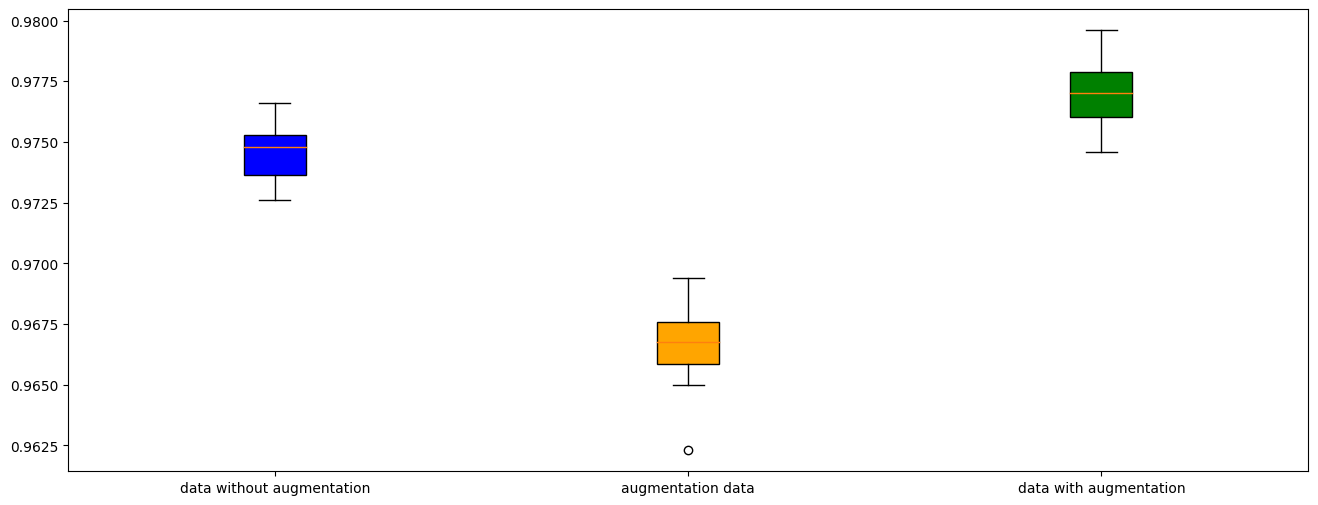

In [8]:
labels = ['data without augmentation', 'augmentation data', 'data with augmentation']

plt.figure(figsize=(16.0,6.0))
y = plt.boxplot(acc1, positions=[0], patch_artist=True)
y['boxes'][0].set_facecolor('blue')
y = plt.boxplot(acc2, positions=[1], patch_artist=True)
y['boxes'][0].set_facecolor('orange')
y = plt.boxplot(acc3, positions=[2], patch_artist=True)
y['boxes'][0].set_facecolor('green')

plt.xticks([i for i in range(3)], labels)

**Вывод**: просто аугментированные данные показывают неплохой результат. Данные вместе с аугментациями показывают результат лучше, чем данные без. Аугментации написано работающе.